In [4]:
import datetime
import sys
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
sys.path.append('/Users/brad_sun/Downloads/workspace/lib/')
# from pcm_tools.toolbox import *
import sqlalchemy
import time

%matplotlib inline

**References**:

Technical Analysis Indicators

https://www.quantopian.com/posts/technical-analysis-indicators

Technical analysis Indicators without Talib (code)

https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code

In [ ]:
"""
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:78: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=10,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=13,min_periods=25,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:98: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=26,min_periods=25,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:100: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=9,min_periods=8,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:130: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:131: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:143: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:144: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:159: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:166: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:181: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:189: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:190: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:191: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:209: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:210: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:223: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:227: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=10,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:230: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:231: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:232: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:239: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=9,min_periods=8,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:240: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=9,min_periods=8,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:242: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:252: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:258: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:261: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:280: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=13,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:280: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=26,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:280: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=52,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:280: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=104,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:288: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:289: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:290: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=19,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:291: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=19,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:309: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=3,min_periods=2,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:309: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=9,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:320: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:321: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:322: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:324: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:325: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:328: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:341: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:348: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:348: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:360: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=10,adjust=True,ignore_na=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:366: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:367: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:368: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:381: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:383: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:386: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:386: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:386: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).sum()
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:400: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:410: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


"""

In [10]:
"""
Table of Contents of TA_package:

1. Simple Moving Average(df, n) (SMA)
2. Exponential Moving Average(df, n) (EMA)
3. Momentum(df, n) (MOM)
4. Rate of Change(df, n) (ROC)
5. Average True Range(df, n) (ATR)
6. Bollinger Bands(df, n, num_of_std) (BBANDS)
7. Pivot Points, Support & Resistance(df) (PPSR)
8. Stochastic oscillator & K (df) (STOK)
9. Stochastic oscillator (df, n) (STO)
10. TRIX (df, n) (TRIX)
11. Average Directional Movement Index(df, n, n_ADX) (ADX)
12. MACD, MACD Signal and MACD difference(df, n_fast, n_slow) (MACD)
13. Mass Index(df) (MassI)
14. Vortex Indicator(df, n) (Vortex)
15. KST Oscillator(df, r1, r2, r3, r4, n1, n2, n3, n4) (KST)
16. Relative Strength Index(df, n) (RSI)
17. True Strength Index(df, r, s) (TSI)
18. Accumulation/Distribution (df, n) (ACCDIST)
19. Chaikin Oscillator (df) (Chaikin)
20. Money Flow Index and Ratio(df, n) (MFI)
21. On-balance Volume(df, n) (OBV)
22. Force Index (df, n) (FORCE)
23. Ease of Movement(df, n) (EOM)
24. Commodity Channel Index(df, n) (CCI)
25. Coppock Curve(df, n) (COPP)
26. Keltner Channel(df, n) (KELCH)
27. Ultimate Oscillator(df) (ULTOSC)
28. Donchian Channel(df, n) (DONCH)
29. Standard Deviation(df, n) (STDDEV)

"""


"""
For now major strategies 

"""

# Done
def MA(df, n): # n = 5
    """
    Moving Average
    rationale CHECKED, code CHECKED. updated

    params:
        df: pd dataframe 
        n: number of days = 5
    """
    MA = df['Close'].rolling(window=n, center=False).mean().rename('MA_' + str(n))
    return MA

# Done
def EMA(df, n): # n = 5
    """
    Exponential Moving Average
    rationale CHECKED, code CHECKED, updated.

    params:
        df: pd dataframe
        n: number of days = 5
    """
    EMA = df['Close'].ewm(span=n, min_periods=n - 1).mean().rename('EMA_' + str(n))
    return EMA

# Done
def MOM(df, n): # n = 5
    """
    Momentum, Diff of prices between the current close and the past n day(s) of close price
    rationale CHECKED, code CHECKED, it involves n+1 numbers.

    params:
        df: pd dataframe
        n: number of days = 5
    """
    MOM = pd.Series(df['Close'].diff(n), name='Momentum_' + str(n))
    return MOM

# Done
def ROC(df, n): # n = 5
    """
    The Rate-of-Change (ROC) indicator, which is also referred to as simply Momentum, 
    is a pure momentum oscillator that measures the percent change in price from one period to the next. 
    The ROC calculation compares the current price with the price “n” periods ago. 
    The plot forms an oscillator that fluctuates above and below the zero line as the Rate-of-Change 
    moves from positive to negative. As a momentum oscillator, ROC signals include centerline crossovers, 
    divergences and overbought-oversold readings. Divergences fail to foreshadow reversals more often 
    than not so this article will forgo a discussion on divergences. Even though centerline crossovers 
    are prone to whipsaw, especially short-term, these crossovers can be used to identify the overall trend. 
    Identifying overbought or oversold extremes comes naturally to the Rate-of-Change oscillator.
    
    ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100

    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:rate_of_change_roc_and_momentum
    """
    
    """
    Rate of Change, rationale CHECKED, code CHECKED
    Category: meansuring momentum
    How this works high-level:
    """
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M / N, name='ROC_' + str(n))
    return ROC

# Done
def ATR(df, n): # n = 14
    
    """
    Typically, the Average True Range (ATR) is based on 14 periods and can be calculated on an intraday, 
    daily, weekly or monthly basis. For this example, the ATR will be based on daily data. 
    Because there must be a beginning, the first TR value is simply the High minus the Low, 
    and the first 14-day ATR is the average of the daily TR values for the last 14 days. 
    After that, Wilder sought to smooth the data by incorporating the previous period's ATR value.
    
    Current ATR = [(Prior ATR x 13) + Current TR] / 14

      - Multiply the previous 14-day ATR by 13.
      - Add the most recent day's TR value.
      - Divide the total by 14
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_true_range_atr
    """
    
    
    """
    Average True Range, rationale CHECKED, code CHECKED, updated
    Category: measuring volatility
    How this works high-level: 
        Calculate the most recent day's largest range considering yesterday's close, today's
        high and today's low
    """
    df = df.reset_index()
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.at[i + 1, 'High'], df.at[i, 'Close']) \
            - min(df.at[i + 1, 'Low'], df.at[i, 'Close'])  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = TR_s.ewm(span = n, min_periods = n).mean().rename('ATR_' + str(n))  
    df = df.join(ATR).set_index("index")
    return df["ATR_" + str(n)]


# Done
def BBANDS(df, n, num_of_std): # n = 20
    """
    Bollinger Bands, rationale CHECKED, code CHECKED
    Create the common bbands which I understand instead of using the one from Quantopian forum.
    """
    rlng_mean = df['Close'].ewm(span = n).mean().rename('Rolling_{}_Day_Mean'.format(n))
    rlng_std  = df['Close'].rolling(window = n).std()
    u_band = (rlng_mean + rlng_std*num_of_std).rename('U_{}d_{}_std_Band'.format(n, num_of_std))
    l_band = (rlng_mean - rlng_std*num_of_std).rename('L_{}d_{}_std_Band'.format(n, num_of_std))
    return rlng_mean, u_band, l_band

# Done
# Rationale checked
def MACD(df, n_fast, n_slow): # n_fast = 12, n_slow = 26
    """
    
    http://stockcharts.com/docs/doku.php?id=scans:indicators

    """
    
    
    """
    MACD, MACD Signal and MACD difference, rationale CHECKED, code CHECKED, updated
    # Conventional look-back window for calculating MACDsign is 9
    """
    EMAfast = df['Close'].ewm(span = n_fast, min_periods = n_fast - 1).mean()
    EMAslow = df['Close'].ewm(span = n_slow, min_periods = n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = MACD.ewm(span = 9, min_periods = 8).mean().rename('MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    return MACD, MACDsign, MACDdiff

# No parameters,
# Still need to understand more
def PPSR(df):
    """
        Pivot Points, Supports and Resistances
        
        http://stockcharts.com/docs/doku.php?id=scans:indicators
    """
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3, name="PP")
    R1 = pd.Series(2 * PP - df['Low'], name="R1")
    S1 = pd.Series(2 * PP - df['High'], name="S1")
    R2 = pd.Series(PP + df['High'] - df['Low'], name="R2")
    S2 = pd.Series(PP - df['High'] + df['Low'], name="S2")
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']), name="R3")
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP), name="S3")
    return PP, R1, S1, R2, S2, R3, S3

# Done
# Rationale checked
def RSI(df, n): # n = 14
    """
    Relative Strength Index, updated.
    Conventional parameters: n = 14, 0.3 and 0.7 are two conventional thresholds
    """
    df = df.reset_index()
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = df.at[i + 1, 'High'] - df.at[i, 'High']
        DoMove = df.at[i, 'Low'] - df.at[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else: UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else: DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI   = pd.Series(UpI)
    DoI   = pd.Series(DoI)
    PosDI = UpI.ewm(span = n, min_periods = n - 1).mean()
    NegDI = DoI.ewm(span = n, min_periods = n - 1).mean()
    RSI   = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))
    df    = df.join(RSI).set_index("index")
    return df["RSI_" + str(n)]


# Done
# Rationale checked
def MFI(df, n): # n = 14
    """Money Flow Index and Ratio, updated.
    http://stockcharts.com/docs/doku.php?id=scans:indicators#money_flow_index_mfi
    
    """
    df = df.reset_index()
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i  = 0
    PosMF = [0]
    while i < df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.at[i + 1, 'Volume'])
        else:
            PosMF.append(0)
        i = i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR   = pd.Series(PosMF / TotMF)
    MFI   = pd.Series(MFR.rolling(window = n, center = False).mean(), name = 'MFI_' + str(n))
    df    = df.join(MFI).set_index("index")
    return df["MFI_" + str(n)]

# Done, no parameters
def STOK(df):
    """Stochastic oscillator %K (Fast Stoch%K)
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:stochastic_oscillator_fast_slow_and_full
    """
    STOK = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')
    return STOK

# Done
def STO(df, n): # n =14
    """Stochastic oscillator %D, updated
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:stochastic_oscillator_fast_slow_and_full
    """
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')
    STO = SOk.ewm(span=n, min_periods=n - 1).mean().rename('SO%d_' + str(n)) 
    return STO

# Done
def TRIX(df, n): # n = 15
    """Trix, updated
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:trix
    """
    df = df.reset_index()
    EX1 = df['Close'].ewm(span = n, min_periods = n - 1).mean()
    EX2 = EX1.ewm(span = n, min_periods = n - 1).mean()
    EX3 = EX2.ewm(span = n, min_periods = n - 1).mean()
    i = 0
    ROC_l = [0]
    while i + 1 <= df.index[-1]:
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]
        ROC_l.append(ROC)
        i = i + 1
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))
    df = df.join(Trix).set_index("index")
    return df["Trix_" + str(n)]

# Done
def ADX(df, n, n_ADX): # n = 14 (for buildinhg ATR in this function), n_ADX = 14 (for building final ADX in this func)
    """
    The Average Directional Index (ADX), Minus Directional Indicator (-DI) and Plus Directional Indicator (+DI) 
    represent a group of directional movement indicators that form a trading system developed by Welles Wilder. 
    Although Wilder designed his Directional Movement System with commodities and daily prices in mind, these 
    indicators can also be applied to stocks.
    
    Positive and negative directional movement form the backbone of the Directional Movement System. Wilder 
    determined directional movement by comparing the difference between two consecutive lows with the difference 
    between their respective highs.
    
    The Plus Directional Indicator (+DI) and Minus Directional Indicator (-DI) are derived from smoothed averages 
    of these differences, and measure trend direction over time. These two indicators are often referred to 
    collectively as the Directional Movement Indicator (DMI).

    The Average Directional Index (ADX) is in turn derived from the smoothed averages of the difference between 
    +DI and -DI, and measures the strength of the trend (regardless of direction) over time.

    Using these three indicators together, chartists can determine both the direction and strength of the trend.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_directional_index_adx
    """
    
    df = df.reset_index()
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= df.index[-1]:
        UpMove = df.at[i + 1, 'High'] - df.at[i, 'High']
        DoMove = df.at[i, 'Low'] - df.at[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpI.append(UpMove)
        else:
            UpI.append(0)
        
        if DoMove > UpMove and DoMove > 0:
            DoI.append(DoMove)
        else:
            DoI.append(0)
        i = i + 1
    i = 0
    TR_l = [0]
    while i < df.index[-1]:
        TR = max(df.at[i + 1, 'High'], df.at[i, 'Close']) \
            - min(df.at[i + 1, 'Low'], df.at[i, 'Close'])
        TR_l.append(TR)
        i = i + 1
    TR_s  = pd.Series(TR_l)
    ATR   = TR_s.ewm(span=n, min_periods=n).mean()
    UpI   = pd.Series(UpI)
    DoI   = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n - 1).mean() / ATR)
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n - 1).mean() / ATR)
    ADX   = pd.Series((abs(PosDI - NegDI) / (PosDI + NegDI)).ewm(span=n_ADX, min_periods=n_ADX - 1).mean(), 
                    name = 'ADX_' + str(n) + '_' + str(n_ADX))
    df = df.join(ADX).set_index("index")
    return df['ADX_' + str(n) + '_' + str(n_ADX)]

# Done, default parameter setup = 9 and 25 
def MassI(df):
    """
    Developed by Donald Dorsey, the Mass Index uses the high-low range to identify trend reversals based on 
    range expansions. In this sense, the Mass Index is a volatility indicator that does not have a directional 
    bias. Instead, the Mass Index identifies range bulges that can foreshadow a reversal of the current trend.
    
    Single EMA = 9-period exponential moving average (EMA) of the high-low differential  
    Double EMA = 9-period EMA of the 9-period EMA of the high-low differential 
    EMA Ratio = Single EMA divided by Double EMA 
    Mass Index = 25-period sum of the EMA Ratio 
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:mass_index
    """
    
    """Mass Index, updated"""
    Range = df['High'] - df['Low']
    EX1 = Range.ewm(span=9, min_periods=8).mean()
    EX2 = EX1.ewm(span=9, min_periods=8).mean()
    Mass = EX1 / EX2
    MassI = pd.Series(Mass.rolling(window=25, center=False).sum(), name='Mass Index')
    return MassI

# Done
def Vortex(df, n): # n = 14
    """
    The Vortex Indicator (VTX) can be used to identify the start of a trend and subsequently affirm trend 
    direction. First, a simple cross of the two oscillators can be used to signal the start of a trend. 
    After this crossover, the trend is up when +VI is above -VI and down when -VI is greater than +VI. 
    Second, a cross above or below a particular level can signal the start of a trend and these levels can 
    be used to affirm trend direction.
    
    Positive and negative trend movement:

    +VM = Current High less Prior Low (absolute value)
    -VM = Current Low less Prior High (absolute value)

    +VM14 = 14-period Sum of +VM
    -VM14 = 14-period Sum of -VM


    True Range (TR) is the greatest of:

      * Current High less current Low
      * Current High less previous Close (absolute value)
      * Current Low less previous Close (absolute value)

    TR14 = 14-period Sum of TR


    Normalize the positive and negative trend movements:

    +VI14 = +VM14/TR14
    -VI14 = -VM14/TR14
    
    
    Vortex Indicator 
    http://www.vortexindicator.com/VFX_VORTEX.PDF
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vortex_indicator
    """
    df = df.reset_index()
    i = 0
    TR = [0]
    while i < df.index[-1]:
        Range = max(df.at[i + 1, 'High'], df.at[i, 'Close']) \
                - min(df.at[i + 1, 'Low'], df.at[i, 'Close'])
        TR.append(Range)
        i = i + 1
    i = 0
    VM = [0]
    while i < df.index[-1]:
        Range = abs(df.at[i + 1, 'High'] - df.at[i, 'Low']) \
                - abs(df.at[i + 1, 'Low'] - df.at[i, 'High'])
        VM.append(Range)
        i = i + 1
    VI = pd.Series(pd.Series(VM).rolling(window=n).sum() / pd.Series(VM).rolling(window=n).sum(), 
                   name='Vortex_' + str(n))
    df = df.join(VI).set_index("index")
    return df["Vortex_" + str(n)]


# Done
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4): # 10, 15, 20, 30, 10, 10, 10, 15
    """
    KST Oscillator, updated
    Even though the formula for KST looks complicated, it is a rather straightforward indicator. 
    It is simply a weighted average of four different rate-of-change values that have been smoothed.
    
    The default parameters are as follows: KST(10,15,20,30,10,10,10,15,9). 
    The first four numbers represent the rate-of-change settings, the second four represent the 
    moving averages for these rate-of-change indicators and the last number is the signal line moving average.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:know_sure_thing_kst
    
    """
    M    = df['Close'].diff(r1 - 1)
    N    = df['Close'].shift(r1 - 1)
    ROC1 = M / N
    M    = df['Close'].diff(r2 - 1)
    N    = df['Close'].shift(r2 - 1)
    ROC2 = M / N
    M    = df['Close'].diff(r3 - 1)
    N    = df['Close'].shift(r3 - 1)
    ROC3 = M / N
    M    = df['Close'].diff(r4 - 1)
    N    = df['Close'].shift(r4 - 1)
    ROC4 = M / N
    KST  = pd.Series(ROC1.rolling(window=n1).sum() + 
                    ROC2.rolling(window=n2).sum() * 2 + 
                    ROC3.rolling(window=n3).sum() * 3 + 
                    ROC4.rolling(window=n4).sum() * 4, 
                name = 'KST_{}_{}_{}_{}_{}_{}_{}_{}'.format(r1, r2, r3, r4, n1, n2, n3, n4))
    return KST


# Done
def TSI(df, r, s): # r = 25, s = 13
    """True Strength Index, updated
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:true_strength_index
    """
    M = pd.Series(df['Close'].diff(1))
    aM = abs(M)
    EMA1  = pd.Series(M.ewm(span=r, min_periods=r - 1).mean())
    aEMA1 = pd.Series(aM.ewm(span=r, min_periods=r - 1).mean())
    EMA2  = pd.Series(EMA1.ewm(span=s, min_periods=s - 1).mean())
    aEMA2 = pd.Series(aEMA1.ewm(span=s, min_periods=s - 1).mean())
    TSI   = pd.Series(EMA2 / aEMA2, name = 'TSI_{}_{}'.format(r, s))
    return TSI


# Discretionarily Done
def ACCDIST(df, n): # n = 5
    """Accumulation/Distribution
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:accumulation_distribution_line
    """
    ad  = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    M   = ad.diff(n - 1)
    N   = ad.shift(n - 1)
    ROC = M / N
    AD  = pd.Series(ROC, name = 'Acc/Dist_ROC_' + str(n))
    return AD


# Done, default parameter setup = 3, 10
def Chaikin(df):
    """Chaikin Oscillator
    
    Developed by Marc Chaikin, the Chaikin Oscillator measures the momentum of the Accumulation Distribution 
    Line using the MACD formula. This makes it an indicator of an indicator. The Chaikin Oscillator is the 
    difference between the 3-day EMA of the Accumulation Distribution Line and the 10-day EMA of the 
    Accumulation Distribution Line. Like other momentum indicators, this indicator is designed to anticipate 
    directional changes in the Accumulation Distribution Line by measuring the momentum behind the movements. 
    A momentum change is the first step to a trend change. Anticipating trend changes in the Accumulation 
    Distribution Line can help chartists anticipate trend changes in the underlying security. The Chaikin 
    Oscillator generates signals with crosses above/below the zero line or with bullish/bearish divergences.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:chaikin_oscillator
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    Chaikin = pd.Series(ad.ewm(span=3, min_periods=2).mean() \
                        - ad.ewm(span=10, min_periods=9).mean(), name = 'Chaikin')
    return Chaikin

# Discretionarily Done
def OBV(df, n): # n = 5
    """On-balance Volume
    
    On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds 
    volume on up days and subtracts volume on down days. OBV was developed by Joe Granville and introduced 
    in his 1963 book, Granville's New Key to Stock Market Profits. It was one of the first indicators to 
    measure positive and negative volume flow. Chartists can look for divergences between OBV and price 
    to predict price movements or use OBV to confirm price trends.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:on_balance_volume_obv
    """
    df = df.reset_index()
    i = 0
    OBV = [0]
    while i < df.index[-1]:
        if df.at[i + 1, 'Close'] - df.at[i, 'Close'] > 0:
            OBV.append(df.at[i + 1, 'Volume'])
        if df.at[i + 1, 'Close'] - df.at[i, 'Close'] == 0:
            OBV.append(0)
        if df.at[i + 1, 'Close'] - df.at[i, 'Close'] < 0:
            OBV.append(-df.at[i + 1, 'Volume'])
        i = i + 1
    OBV = pd.Series(OBV)
    OBV_ma = pd.Series(OBV.rolling(window=n).mean(), name = 'OBV_' + str(n))
    return OBV_ma

# Done
def FORCE(df, n): # n = 13
    """Force Index
    
    The Force Index combines all three as an oscillator that fluctuates in positive and negative 
    territory as the balance of power shifts. The Force Index can be used to reinforce the overall 
    trend, identify playable corrections or foreshadow reversals with divergences.
    
    Force Index(1) = {Close (current period)  -  Close (prior period)} x Volume
    Force Index(13) = 13-period EMA of Force Index(1)
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:force_index
    """
    F = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name = 'Force_' + str(n))
    return F


# Done
# Rationale checked: helps identify strength of the trend
def EOM(df, n): # n = 14
    """Ease of Movement
    
    Developed by Richard Arms, Ease of Movement (EMV) is a volume-based oscillator that fluctuates above 
    and below the zero line. As its name implies, it is designed to measure the “ease” of price movement. 
    Arms created Equivolume charts to visually display price ranges and volume. Ease of Movement takes 
    Equivolume to the next level by quantifying the price/volume relationship and showing the results 
    as an oscillator. In general, prices are advancing with relative ease when the oscillator is in 
    positive territory. Conversely, prices are declining with relative ease when the oscillator is in 
    negative territory.
    
    Distance Moved = ((H + L)/2 - (Prior H + Prior L)/2) 
    Box Ratio = ((V/100,000,000)/(H - L))
    1-Period EMV = ((H + L)/2 - (Prior H + Prior L)/2) / ((V/100,000,000)/(H - L))
    14-Period Ease of Movement = 14-Period simple moving average of 1-period EMV
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:ease_of_movement_emv
    """
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])
    Eom_ma = EoM.rolling(window=n).mean().rename('EoM_' + str(n))
    return Eom_ma

# Done
# Rationale checked. 
def CCI(df, n): # n = 20
    """
    Commodity Channel Index
    Developed by Donald Lambert and featured in Commodities magazine in 1980, the Commodity Channel Index (CCI) 
    is a versatile indicator that can be used to identify a new trend or warn of extreme conditions. 
    Lambert originally developed CCI to identify cyclical turns in commodities, but the indicator can 
    be successfully applied to indices, ETFs, stocks, and other securities. In general, CCI measures the 
    current price level relative to an average price level over a given period of time. CCI is relatively 
    high when prices are far above their average. CCI is relatively low when prices are far below their average. 
    In this manner, CCI can be used to identify overbought and oversold levels.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:commodity_channel_index_cci
    
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    # This is rolling z-score
    CCI = pd.Series((PP - PP.rolling(window = n).mean()) / PP.rolling(window = n).std(), name = 'CCI_' + str(n))    
    return CCI


# Done
# Rationale checked
def COPP(df, n): # n = 10
    """Coppock Curve
    
    The Coppock Curve is a momentum indicator developed by Edwin “Sedge” Coppock, who was an economist 
    by training. Coppock introduced the indicator in Barron's in October 1965. The goal of this indicator 
    is to identify long-term buying opportunities in the S&P 500 and Dow Industrials. The signal is very simple. 
    Coppock used monthly data to identify buying opportunities when the indicator moved from negative territory 
    to positive territory. Although Coppock did not use it for sell signals, many technical analysts consider 
    a cross from positive to negative territory as a sell signal.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:coppock_curve
    
    """
    M = df['Close'].diff(int(n * 11 / 10) - 1)
    N = df['Close'].shift(int(n * 11 / 10) - 1)
    ROC1 = M / N
    M = df['Close'].diff(int(n * 14 / 10) - 1)
    N = df['Close'].shift(int(n * 14 / 10) - 1)
    ROC2 = M / N
    Copp = (ROC1 + ROC2).ewm(span=n, min_periods=n).mean().rename("Copp_" + str(n))
    return Copp


# Done
# Rationale checked
def KELCH(df, n): # n = 20
    """Keltner Channel
    Keltner Channels are volatility-based envelopes set above and below an exponential moving average. 
    This indicator is similar to Bollinger Bands, which use the standard deviation to set the bands. 
    Instead of using the standard deviation, Keltner Channels use the Average True Range (ATR) to 
    set channel distance. The channels are typically set two Average True Range values above and below 
    the 20-day EMA. The exponential moving average dictates direction and the Average True Range sets 
    channel width. Keltner Channels are a trend following indicator used to identify reversals with channel 
    breakouts and channel direction. Channels can also be used to identify overbought and oversold levels 
    when the trend is flat.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:keltner_channels
    """
    KelChM = ((df['High'] + df['Low'] + df['Close']) / 3).rolling(window=n).mean().rename('KelChM_' + str(n))
    KelChU = ((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3).rolling(window=n).mean().rename('KelChU_' + str(n))
    KelChD = ((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3).rolling(window=n).mean().rename('KelChD_' + str(n))
    return KelChM, KelChU, KelChD


# Done, default parameter setup = 7, 14, 28 
def ULTOSC(df):
    """Ultimate Oscillator
    
    Developed by Larry Williams in 1976 and featured in Stocks & Commodities Magazine in 1985, 
    the Ultimate Oscillator is a momentum oscillator designed to capture momentum across three 
    different timeframes. The multiple timeframe objective seeks to avoid the pitfalls of other 
    oscillators. Many momentum oscillators surge at the beginning of a strong advance and then 
    form a bearish divergence as the advance continues. This is because they are stuck with one 
    timeframe. The Ultimate Oscillator attempts to correct this fault by incorporating longer 
    timeframes into the basic formula. Williams identified a buy signal a based on a bullish 
    divergence and a sell signal based on a bearish divergence.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:ultimate_oscillator
    
    """
    df = df.reset_index()
    i = 0
    TR_l = [0]
    BP_l = [0]
    while i < df.index[-1]:
        TR = max(df.at[i + 1, 'High'], df.at[i, 'Close']) - min(df.at[i + 1, 'Low'], df.at[i, 'Close'])
        TR_l.append(TR)
        BP = df.at[i + 1, 'Close'] - min(df.at[i + 1, 'Low'], df.at[i, 'Close'])
        BP_l.append(BP)
        i = i + 1
    UltO = pd.Series((4 * pd.Series(BP_l).rolling(window=7).sum() / pd.Series(TR_l).rolling(window=7).sum()) \
                     + (2 * pd.Series(BP_l).rolling(window=14).sum() / pd.Series(TR_l).rolling(window=14).sum()) \
                     + (pd.Series(BP_l).rolling(window=28).sum() / pd.Series(TR_l).rolling(window=28).sum()),
                     name = 'Ultimate_Osc')
    df = df.join(UltO).set_index("index")
    return df["Ultimate_Osc"]


# TBD
def DONCH(df, n): # n = 5
    """Donchian Channel"""
    df = df.reset_index()
    i = 0
    DC_l = []
    while i < n - 1:
        DC_l.append(0)
        i = i + 1
    i = 0
    while i + n - 1 < df.index[-1]:
        DC = max(df['High'].iloc[i:i + n - 1]) - min(df['Low'].iloc[i:i + n - 1])
        DC_l.append(DC)
        i = i + 1
    DonCh = pd.Series(DC_l, name = 'Donchian_' + str(n))
    DonCh = DonCh.shift(n - 1)
    df = df.join(DonCh).set_index("index")
    return df["Donchian_" + str(n)]

# Done, rationale checked
def STDDEV(df, n): # n = 10
    """Standard Deviation, i.e. historical volatility
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:standard_deviation_volatility
    """
    STDDEV = df['Close'].rolling(window=n).std().rename('STD_' + str(n))
    return STDDEV  

In [6]:
# Create database connection
database = 'archive'
username = 'quant'
password = '8ad7a2be0e3ec3fbc3a16fab306f08d8'
host     = '159.65.252.27'
connection_string = 'postgresql://' + username + ':' + password + '@' + host + '/' + database
engine   = sqlalchemy.create_engine(connection_string)

/Users/brad_sun/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [7]:
# Read in data
query = """
select *
from targets.yahoo_returns_1day
where ticker in (VALUES('A'),('ABT'),('ABBV'),('ACN'),('ATVI'),('AYI'),('ADBE'),('AMD'),('AAP'),('AES'),('AET'),('AMG'),('AFL'),('A'),('APD'),('AKAM'),('ALK'),('ALB'),('ARE'),('ALXN'),('ALGN'),('ALLE'),('AGN'),('ADS'),('LNT'),('ALL'),('GOOGL'),('GOOG'),('MO'),('AMZN'),('AEE'),('AAL'),('AEP'),('AXP'),('AIG'),('AMT'),('AWK'),('AMP'),('ABC'),('AME'),('AMGN'),('APH'),('APC'),('ADI'),('ANDV'),('ANSS'),('ANTM'),('AON'),('AOS'),('APA'),('AIV'),('AAPL'),('AMAT'),('APTV'),('ADM'),('ARNC'),('AJG'),('AIZ'),('T'),('ADSK'),('ADP'),('AZO'),('AVB'),('AVY'),('BHGE'),('BLL'),('BAC'),('BK'),('BCR'),('BAX'),('BBT'),('BDX'),('BRK-B'),('BBY'),('BIIB'),('BLK'),('HRB'),('BA'),('BWA'),('BXP'),('BSX'),('BHF'),('BMY'),('AVGO'),('BF-B'),('CHRW'),('CA'),('COG'),('CDNS'),('CPB'),('COF'),('CAH'),('CBOE'),('KMX'),('CCL'),('CAT'),('CBG'),('CBS'),('CELG'),('CNC'),('CNP'),('CTL'),('CERN'),('CF'),('SCHW'),('CHTR'),('CHK'),('CVX'),('CMG'),('CB'),('CHD'),('CI'),('XEC'),('CINF'),('CTAS'),('CSCO'),('C'),('CFG'),('CTXS'),('CLX'),('CME'),('CMS'),('KO'),('CTSH'),('CL'),('CMCSA'),('CMA'),('CAG'),('CXO'),('COP'),('ED'),('STZ'),('COO'),('GLW'),('COST'),('COTY'),('CCI'),('CSRA'),('CSX'),('CMI'),('CVS'),('DHI'),('DHR'),('DRI'),('DVA'),('DE'),('DAL'),('XRAY'),('DVN'),('DLR'),('DFS'),('DISCA'),('DISCK'),('DISH'),('DG'),('DLTR'),('D'),('DOV'),('DWDP'),('DPS'),('DTE'),('DRE'),('DUK'),('DXC'),('ETFC'),('EMN'),('ETN'),('EBAY'),('ECL'),('EIX'),('EW'),('EA'),('EMR'),('ETR'),('EVHC'),('EOG'),('EQT'),('EFX'),('EQIX'),('EQR'),('ESS'),('EL'),('ES'),('RE'),('EXC'),('EXPE'),('EXPD'),('ESRX'),('EXR'),('XOM'),('FFIV'),('FB'),('FAST'),('FRT'),('FDX'),('FIS'),('FITB'),('FE'),('FISV'),('FLIR'),('FLS'),('FLR'),('FMC'),('FL'),('F'),('FTV'),('FBHS'),('BEN'),('FCX'),('GPS'),('GRMN'),('IT'),('GD'),('GE'),('GGP'),('GIS'),('GM'),('GPC'),('GILD'),('GPN'),('GS'),('GT'),('GWW'),('HAL'),('HBI'),('HOG'),('HRS'),('HIG'),('HAS'),('HCA'),('HCP'),('HP'),('HSIC'),('HSY'),('HES'),('HPE'),('HLT'),('HOLX'),('HD'),('HON'),('HRL'),('HST'),('HPQ'),('HUM'),('HBAN'),('IDXX'),('INFO'),('ITW'),('ILMN'),('IR'),('INTC'),('ICE'),('IBM'),('INCY'),('IP'),('IPG'),('IFF'),('INTU'),('ISRG'),('IVZ'),('IQV'),('IRM'),('JEC'),('JBHT'),('SJM'),('JNJ'),('JCI'),('JPM'),('JNPR'),('KSU'),('K'),('KEY'),('KMB'),('KIM'),('KMI'),('KLAC'),('KSS'),('KHC'),('KR'),('LB'),('LLL'),('LH'),('LRCX'),('LEG'),('LEN'),('LUK'),('LLY'),('LNC'),('LKQ'),('LMT'),('L'),('LOW'),('LYB'),('MTB'),('MAC'),('M'),('MRO'),('MPC'),('MAR'),('MMC'),('MLM'),('MAS'),('MA'),('MAT'),('MKC'),('MCD'),('MCK'),('MDT'),('MRK'),('MET'),('MTD'),('MGM'),('KORS'),('MCHP'),('MU'),('MSFT'),('MAA'),('MHK'),('TAP'),('MDLZ'),('MON'),('MNST'),('MCO'),('MS'),('MOS'),('MSI'),('MYL'),('NDAQ'),('NOV'),('NAVI'),('NTAP'),('NFLX'),('NWL'),('NFX'),('NEM'),('NWSA'),('NWS'),('NEE'),('NLSN'),('NKE'),('NI'),('NBL'),('JWN'),('NSC'),('NTRS'),('NOC'),('NCLH'),('NRG'),('NUE'),('NVDA'),('ORLY'),('OXY'),('OMC'),('OKE'),('ORCL'),('PCAR'),('PKG'),('PH'),('PDCO'),('PAYX'),('PYPL'),('PNR'),('PBCT'),('PEP'),('PKI'),('PRGO'),('PFE'),('PCG'),('PM'),('PSX'),('PNW'),('PXD'),('PNC'),('RL'),('PPG'),('PPL'),('PX'),('PCLN'),('PFG'),('PG'),('PGR'),('PLD'),('PRU'),('PEG'),('PSA'),('PHM'),('PVH'),('QRVO'),('PWR'),('QCOM'),('DGX'),('RRC'),('RJF'),('RTN'),('O'),('RHT'),('REG'),('REGN'),('RF'),('RSG'),('RMD'),('RHI'),('ROK'),('COL'),('ROP'),('ROST'),('RCL'),('CRM'),('SBAC'),('SCG'),('SLB'),('SNI'),('STX'),('SEE'),('SRE'),('SHW'),('SIG'),('SPG'),('SWKS'),('SLG'),('SNA'),('SO'),('LUV'),('SPGI'),('SWK'),('SBUX'),('STT'),('SRCL'),('SYK'),('STI'),('SYMC'),('SYF'),('SNPS'),('SYY'),('TROW'),('TPR'),('TGT'),('TEL'),('FTI'),('TXN'),('TXT'),('TMO'),('TIF'),('TWX'),('TJX'),('TMK'),('TSS'),('TSCO'),('TDG'),('TRV'),('TRIP'),('FOXA'),('FOX'),('TSN'),('UDR'),('ULTA'),('USB'),('UA'),('UAA'),('UNP'),('UAL'),('UNH'),('UPS'),('URI'),('UTX'),('UHS'),('UNM'),('VFC'),('VLO'),('VAR'),('VTR'),('VRSN'),('VRSK'),('VZ'),('VRTX'),('VIAB'),('V'),('VNO'),('VMC'),('WMT'),('WBA'),('DIS'),('WM'),('WAT'),('WEC'),('WFC'),('HCN'),('WDC'),('WU'),('WRK'),('WY'),('WHR'),('WMB'),('WLTW'),('WYN'),('WYNN'),('XEL'),('XRX'),('XLNX'),('XL'),('XYL'),('YUM'),('ZBH'),('ZION'),('ZTS') ) order by date, ticker"""
df = pd.read_sql_query(query, engine)

In [72]:
df_renamed = df.copy()
del df_renamed['adj_close']
df_renamed.columns = ['date', 'ticker', 'Open', 'High', 'Low', 'oo',
       'oc', 'cc', 'co', 'Close', 'Volume']

In [62]:
# df_renamed.index = pd.to_datetime(df_renamed['date'])
# del df_renamed['date']

In [76]:
df_renamed.head()

,date,ticker,Open,High,Low,oo,oc,cc,co,Close,Volume
0,2013-08-01,A,32.553650,33.047211,32.417740,0.010435,0.011646,0.029287,0.017438,32.932762,3827000.0
1,2013-08-01,AAL,19.440001,19.590000,19.240000,0.009870,-0.003087,0.001550,0.004651,19.379999,7989100.0
2,2013-08-01,AAP,83.169998,83.720001,82.470001,0.011185,0.003126,0.011395,0.008243,83.430000,912800.0
3,2013-08-01,AAPL,65.107140,65.257141,64.751427,0.001670,0.002041,0.009171,0.007116,65.239998,51562700.0
4,2013-08-01,ABBV,45.139999,45.900002,45.040001,0.006690,0.002437,-0.005057,-0.007476,45.250000,3652400.0


In [73]:
df_renamed

,date,ticker,Open,High,Low,oo,oc,cc,co,Close,Volume
0,2013-08-01,A,32.553650,33.047211,32.417740,0.010435,0.011646,0.029287,0.017438,32.932762,3827000.0
1,2013-08-01,AAL,19.440001,19.590000,19.240000,0.009870,-0.003087,0.001550,0.004651,19.379999,7989100.0
2,2013-08-01,AAP,83.169998,83.720001,82.470001,0.011185,0.003126,0.011395,0.008243,83.430000,912800.0
3,2013-08-01,AAPL,65.107140,65.257141,64.751427,0.001670,0.002041,0.009171,0.007116,65.239998,51562700.0
4,2013-08-01,ABBV,45.139999,45.900002,45.040001,0.006690,0.002437,-0.005057,-0.007476,45.250000,3652400.0
5,2013-08-01,ABC,58.389999,59.119999,58.369999,-0.002562,0.007022,0.009096,0.002059,58.799999,1746200.0
6,2013-08-01,ABT,36.889999,37.070000,36.680000,0.000542,-0.001355,0.005733,0.007098,36.840000,7479900.0
7,2013-08-01,ACN,74.209999,74.970001,73.750000,0.007057,0.008624,0.014090,0.005419,74.849998,2972200.0
8,2013-08-01,ADBE,47.619999,47.820000,47.410000,0.002526,0.001680,0.008883,0.007191,47.700001,3497600.0
9,2013-08-01,ADI,49.570000,50.000000,49.570000,0.008751,0.007464,0.011341,0.003848,49.939999,1448500.0


# Brad's method

In [69]:
# def tech_ind_trans(df):

#     print ('Processing New Ticker...')
#     ma_df = MA(df, 10)
#     exp_mov_df = EMA(df, 10)
#     mom_df = MOM(df, 10)
#     roc_df = ROC(df, 10)
#     atr_df = ATR(df, 14)
#     bband_df = BBANDS(df, 20, 2)
#     macd_df = MACD(df, 12, 26)
#     ppsr_df = PPSR(df)
#     rsi_df = RSI(df, 14)
#     mfi_df = MFI(df, 14)
#     stok_df = STOK(df)
#     sto_df = STO(df, 14)
#     trix_df = TRIX(df, 15)
#     adx_df = ADX(df, 14, 14)
#     massi_df = MassI(df)
#     vortex_df = Vortex(df, 14)
#     kst_df = KST(df, 10, 15, 20, 30, 10, 10, 10, 15)
#     tsi_df = TSI(df, 25, 13)
#     accdist_df = ACCDIST(df, 5)
#     chaikin_df = Chaikin(df)
#     obv_df = OBV(df, 5)
#     force_df = FORCE(df, 13)
#     eom_df = EOM(df, 14)
#     cci_df = CCI(df, 20)
#     copp_df = COPP(df, 10)
#     kelch_df = KELCH(df, 20)
#     ultosc_df = ULTOSC(df)
#     donch_df = DONCH(df, 5)
#     stddev_df = STDDEV(df, 10)
    
#     final_df = ma_df.merge(exp_mov_df)
#     final_df = final_df.merge(mom_df)
#     final_df = final_df.merge(roc_df)
#     final_df = final_df.merge(atr_df)
#     final_df = final_df.merge(bband_df)
#     final_df = final_df.merge(macd_df)
#     final_df = final_df.merge(ppsr_df)
#     final_df = final_df.merge(rsi_df)
#     final_df = final_df.merge(mfi_df)
#     final_df = final_df.merge(sto_df)
#     final_df = final_df.merge(stok_df)
#     final_df = final_df.merge(trix_df)
#     final_df = final_df.merge(adx_df)
#     final_df = final_df.merge(massi_df)
#     final_df = final_df.merge(vortex_df)
#     final_df = final_df.merge(kst_df)
#     final_df = final_df.merge(tsi_df)
#     final_df = final_df.merge(accdist_df)
#     final_df = final_df.merge(chaikin_df)
#     final_df = final_df.merge(obv_df)
#     final_df = final_df.merge(force_df)
#     final_df = final_df.merge(eom_df)
#     final_df = final_df.merge(cci_df)
#     final_df = final_df.merge(copp_df)
#     final_df = final_df.merge(kelch_df)
#     final_df = final_df.merge(ultosc_df)
#     final_df = final_df.merge(donch_df)
#     final_df = final_df.merge(stddev_df)
    
#     return final_df

In [74]:
# start_time = time.time()
# All_TI_df_brad = df_renamed.groupby('ticker').apply(tech_ind_trans)

# end_time = time.time()
# elapsed_time = int(end_time - start_time)
# elapsed_time = str(datetime.timedelta(seconds=elapsed_time))
# print(elapsed_time)

Processing New Ticker...
Processing New Ticker...


AttributeError: 'Series' object has no attribute 'merge'

# Yuxiang's method (previous issue: no dates, now fixed)

In [79]:
def list_append(l, result):
    if isinstance(result, tuple):
        l.extend(result)
    elif isinstance(result, pd.Series):
        l.append(result)

def tech_ind_trans(df):
#     n = 10
#     n_ADX = 10
#     # BBANDS
#     num_of_std = 2
#     # KST
#     r1 = 5
#     r2 = 6
#     r3 = 7
#     r4 = 8
#     n1 = 13
#     n2 = 26
#     n3 = 52
#     n4 = 104
#     n_fast = 13
#     n_slow = 26
#     # TSI
#     r = 10
#     s = 20

#     print ('Processing New Ticker...')
    TA = [df]
    list_append(TA, MA(df, 10))
    list_append(TA, EMA(df, 10))
    list_append(TA, MOM(df, 10))
    list_append(TA, ROC(df, 10))
    list_append(TA, ATR(df, 14))
    list_append(TA, BBANDS(df, 20, 2))
    list_append(TA, MACD(df, 12, 26))
    list_append(TA, PPSR(df))
    list_append(TA, RSI(df, 14))
    list_append(TA, MFI(df, 14))
    list_append(TA, STOK(df))
    list_append(TA, STO(df, 14))
    list_append(TA, TRIX(df, 15))
    list_append(TA, ADX(df, 14, 14))
    list_append(TA, MassI(df))
    list_append(TA, Vortex(df, 14))
    list_append(TA, KST(df, 10, 15, 20, 30, 10, 10, 10, 15))
    list_append(TA, TSI(df, 25, 13))
    list_append(TA, ACCDIST(df, 5))
    list_append(TA, Chaikin(df))
    list_append(TA, OBV(df, 5))
    list_append(TA, FORCE(df, 13))
    list_append(TA, EOM(df, 14))
    list_append(TA, CCI(df, 20))
    list_append(TA, COPP(df, 10))
    list_append(TA, KELCH(df, 20))
    list_append(TA, ULTOSC(df))
    list_append(TA, DONCH(df, 5))
    list_append(TA, STDDEV(df, 10))
    
    final_df = pd.concat(TA, axis=1)
    
    return final_df

# Run code

In [80]:
start_time = datetime.datetime.now()
print("start time", start_time)
All_TI_df = df_renamed.groupby('ticker').apply(tech_ind_trans)

end_time = datetime.datetime.now()
print("end time", end_time)
elapsed_time = end_time - start_time
print("time elapsed", elapsed_time)

start time 2018-04-24 15:17:08.269940
end time 2018-04-24 15:23:28.485539
time elapsed 0:06:20.215599


In [81]:
All_TI_df.columns.tolist()

['date',
 'ticker',
 'Open',
 'High',
 'Low',
 'oo',
 'oc',
 'cc',
 'co',
 'Close',
 'Volume',
 'MA_10',
 'EMA_10',
 'Momentum_10',
 'ROC_10',
 'ATR_14',
 'Rolling_20_Day_Mean',
 'U_20d_2_std_Band',
 'L_20d_2_std_Band',
 'MACD_12_26',
 'MACDsign_12_26',
 'MACDdiff_12_26',
 'PP',
 'R1',
 'S1',
 'R2',
 'S2',
 'R3',
 'S3',
 'RSI_14',
 'MFI_14',
 'SO%k',
 'SO%d_14',
 'Trix_15',
 'ADX_14_14',
 'Mass Index',
 'Vortex_14',
 'KST_10_15_20_30_10_10_10_15',
 'TSI_25_13',
 'Acc/Dist_ROC_5',
 'Chaikin',
 'OBV_5',
 'Force_13',
 'EoM_14',
 'CCI_20',
 'Copp_10',
 'KelChM_20',
 'KelChU_20',
 'KelChD_20',
 'Ultimate_Osc',
 'Donchian_5',
 'STD_10']

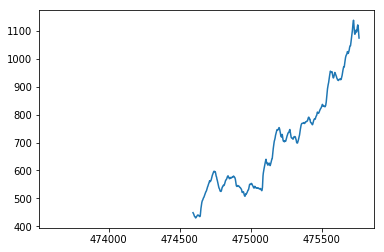

In [89]:
reset_index_tech_int_df[reset_index_tech_int_df['ticker']=='GOOG']['Rolling_20_Day_Mean'].plot()

In [90]:
All_TI_df.to_csv('4_24_all_29_prepped_technical_indicator_sp500_daily_data.csv')

# Data QA

In [114]:
aapl = All_TI_df[All_TI_df['ticker']=='AAPL']
aapl.index = aapl['date']

In [118]:
aapl

,date,ticker,Open,High,Low,oo,oc,cc,co,Close,...,Force_13,EoM_14,CCI_20,Copp_10,KelChM_20,KelChU_20,KelChD_20,Ultimate_Osc,Donchian_5,STD_10
date,,,,,,,,,,,,,,,,,,,,,
2013-08-01,2013-08-01,AAPL,65.107140,65.257141,64.751427,0.001670,0.002041,0.009171,0.007116,65.239998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-02,2013-08-02,AAPL,65.430000,66.121429,65.237144,0.004959,0.009891,0.012832,0.002912,66.077141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-05,2013-08-05,AAPL,66.384285,67.238571,66.021431,0.014585,0.010243,0.014939,0.004648,67.064285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-06,2013-08-06,AAPL,66.860001,67.412857,66.024284,0.007166,-0.005919,-0.008947,-0.003046,66.464287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-07,2013-08-07,AAPL,66.257141,66.714287,65.967140,-0.009017,0.002544,-0.000580,-0.003117,66.425713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-08,2013-08-08,AAPL,66.265717,66.300003,65.421425,0.000129,-0.006144,-0.008538,-0.002409,65.858574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-09,2013-08-09,AAPL,65.519997,65.779999,64.807144,-0.011253,-0.009136,-0.014230,-0.005141,64.921425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-12,2013-08-12,AAPL,65.265717,66.949997,65.232857,-0.003881,0.022983,0.028408,0.005303,66.765717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-13,2013-08-13,AAPL,67.277145,70.665718,66.864288,0.030819,0.039559,0.047522,0.007660,69.938568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.661430,NaN


In [119]:
aapl_col_to_plot = aapl.columns[2:]

In [175]:
aapl_to_plot = aapl[aapl_col_to_plot]

In [176]:
aapl_to_plot.head()

,Open,High,Low,oo,oc,cc,co,Close,Volume,MA_10,...,Force_13,EoM_14,CCI_20,Copp_10,KelChM_20,KelChU_20,KelChD_20,Ultimate_Osc,Donchian_5,STD_10
date,,,,,,,,,,,,,,,,,,,,,
2013-08-01,65.107140,65.257141,64.751427,0.001670,0.002041,0.009171,0.007116,65.239998,51562700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-02,65.430000,66.121429,65.237144,0.004959,0.009891,0.012832,0.002912,66.077141,68695900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-05,66.384285,67.238571,66.021431,0.014585,0.010243,0.014939,0.004648,67.064285,79713900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-06,66.860001,67.412857,66.024284,0.007166,-0.005919,-0.008947,-0.003046,66.464287,83714400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-07,66.257141,66.714287,65.967140,-0.009017,0.002544,-0.000580,-0.003117,66.425713,74714500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [172]:
len(aapl_to_plot.columns)

50

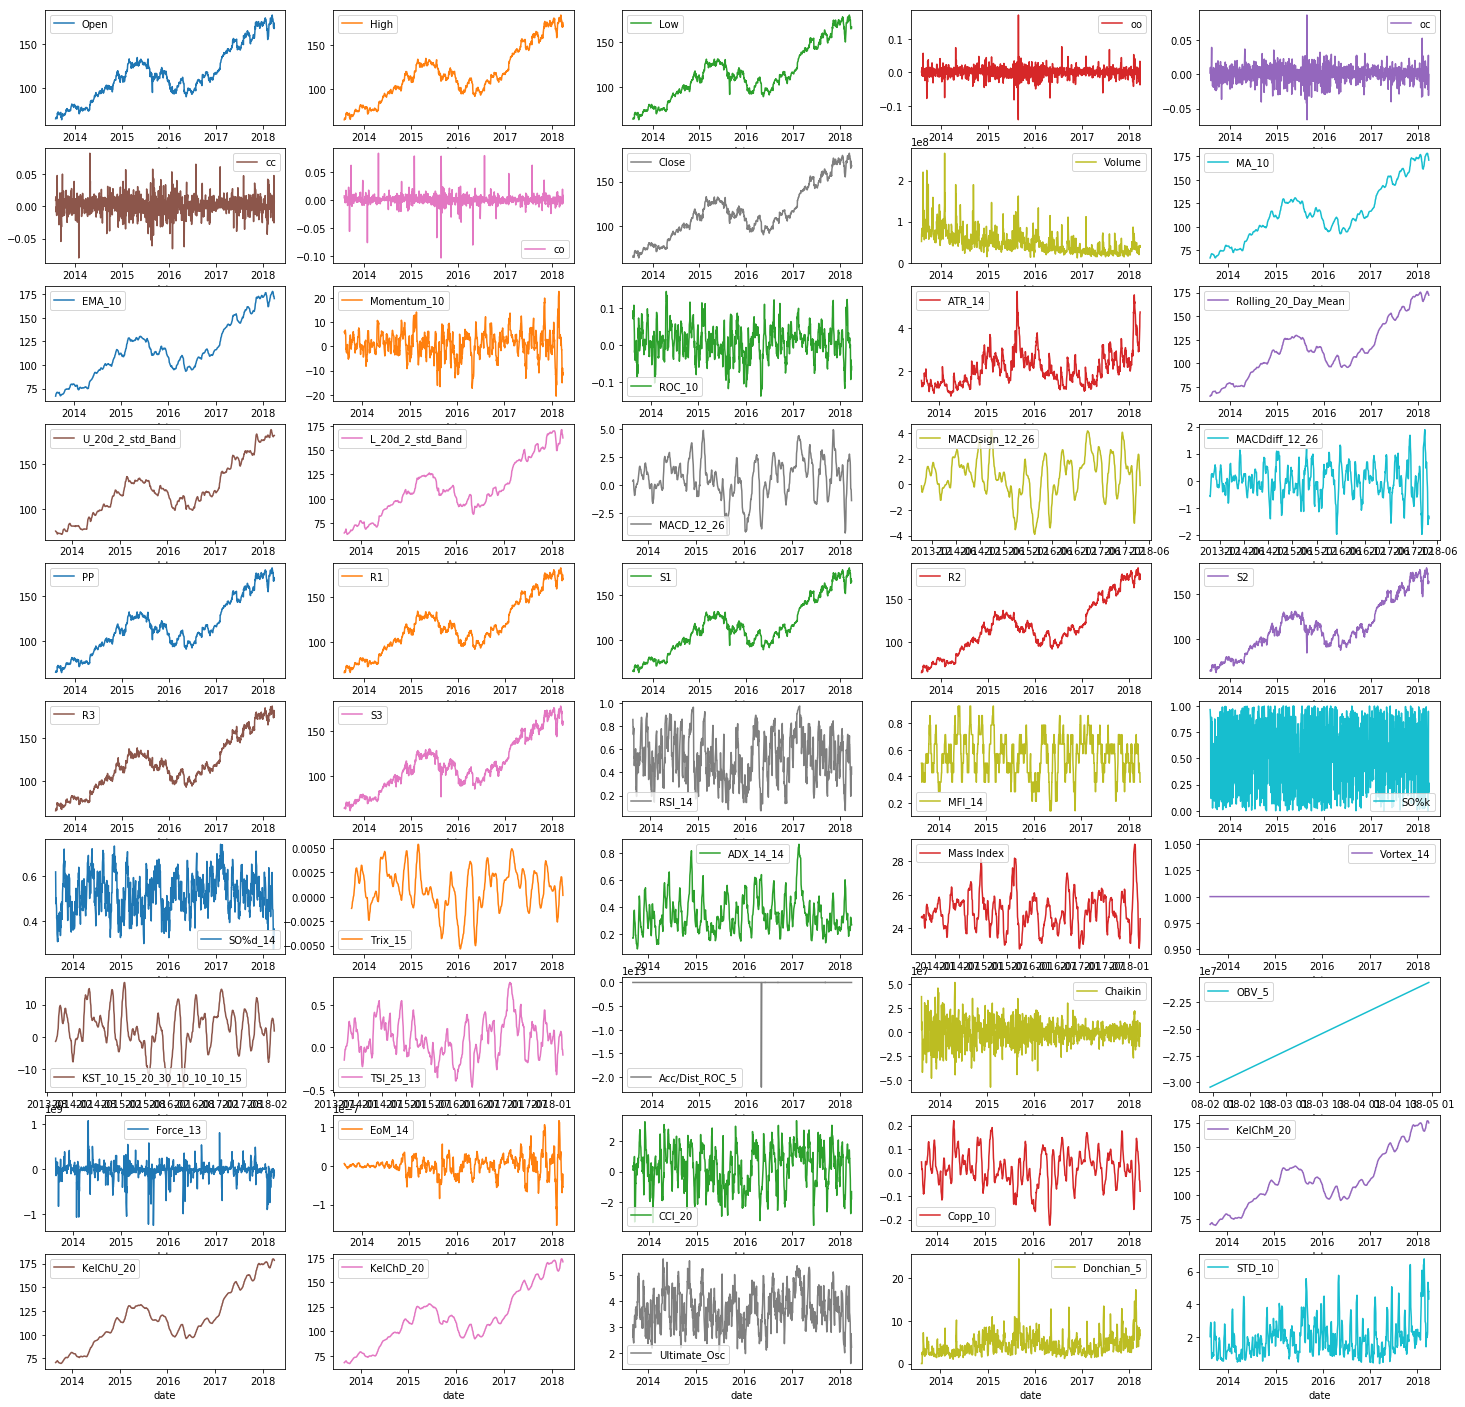

In [177]:
aapl_to_plot.plot(subplots=True, layout=(10, 5), figsize=(25,25), sharex=False);

In [135]:
aapl_to_plot

,Open,High,Low,oo,oc,cc,co,Close,Volume,MA_10,...,Force_13,EoM_14,CCI_20,Copp_10,KelChM_20,KelChU_20,KelChD_20,Ultimate_Osc,Donchian_5,STD_10
date,,,,,,,,,,,,,,,,,,,,,
2013-08-01,65.107140,65.257141,64.751427,0.001670,0.002041,0.009171,0.007116,65.239998,51562700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-02,65.430000,66.121429,65.237144,0.004959,0.009891,0.012832,0.002912,66.077141,68695900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-05,66.384285,67.238571,66.021431,0.014585,0.010243,0.014939,0.004648,67.064285,79713900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-06,66.860001,67.412857,66.024284,0.007166,-0.005919,-0.008947,-0.003046,66.464287,83714400.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-07,66.257141,66.714287,65.967140,-0.009017,0.002544,-0.000580,-0.003117,66.425713,74714500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-08,66.265717,66.300003,65.421425,0.000129,-0.006144,-0.008538,-0.002409,65.858574,63944300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-09,65.519997,65.779999,64.807144,-0.011253,-0.009136,-0.014230,-0.005141,64.921425,66716300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-12,65.265717,66.949997,65.232857,-0.003881,0.022983,0.028408,0.005303,66.765717,91108500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-08-13,67.277145,70.665718,66.864288,0.030819,0.039559,0.047522,0.007660,69.938568,220485300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.661430,NaN


In [136]:
def OBV(df, n): # n = 5
    """On-balance Volume
    
    On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds 
    volume on up days and subtracts volume on down days. OBV was developed by Joe Granville and introduced 
    in his 1963 book, Granville's New Key to Stock Market Profits. It was one of the first indicators to 
    measure positive and negative volume flow. Chartists can look for divergences between OBV and price 
    to predict price movements or use OBV to confirm price trends.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:on_balance_volume_obv
    """
    df = df.reset_index()
    i = 0
    OBV = [0]
    while i < df.index[-1]:
        if df.at[i + 1, 'Close'] - df.at[i, 'Close'] > 0:
            OBV.append(df.at[i + 1, 'Volume'])
        if df.at[i + 1, 'Close'] - df.at[i, 'Close'] == 0:
            OBV.append(0)
        if df.at[i + 1, 'Close'] - df.at[i, 'Close'] < 0:
            OBV.append(-df.at[i + 1, 'Volume'])
        i = i + 1
    OBV = pd.Series(OBV)
    OBV_ma = pd.Series(OBV.rolling(window=n).mean(), name = 'OBV_' + str(n))
    return OBV_ma

In [138]:
aapl_to_plot_obv_check = aapl_to_plot[['Close', 'Volume']]

1173

In [164]:
aapl_to_plot['OBV_5_new'] = OBV(aapl_to_plot, 5)

/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
aapl_to_plot['OBV_5_new']

date
2013-08-01   NaN
2013-08-02   NaN
2013-08-05   NaN
2013-08-06   NaN
2013-08-07   NaN
2013-08-08   NaN
2013-08-09   NaN
2013-08-12   NaN
2013-08-13   NaN
2013-08-14   NaN
2013-08-15   NaN
2013-08-16   NaN
2013-08-19   NaN
2013-08-20   NaN
2013-08-21   NaN
2013-08-22   NaN
2013-08-23   NaN
2013-08-26   NaN
2013-08-27   NaN
2013-08-28   NaN
2013-08-29   NaN
2013-08-30   NaN
2013-09-03   NaN
2013-09-04   NaN
2013-09-05   NaN
2013-09-06   NaN
2013-09-09   NaN
2013-09-10   NaN
2013-09-11   NaN
2013-09-12   NaN
              ..
2018-02-15   NaN
2018-02-16   NaN
2018-02-20   NaN
2018-02-21   NaN
2018-02-22   NaN
2018-02-23   NaN
2018-02-26   NaN
2018-02-27   NaN
2018-02-28   NaN
2018-03-01   NaN
2018-03-02   NaN
2018-03-05   NaN
2018-03-06   NaN
2018-03-07   NaN
2018-03-08   NaN
2018-03-09   NaN
2018-03-12   NaN
2018-03-13   NaN
2018-03-14   NaN
2018-03-15   NaN
2018-03-16   NaN
2018-03-19   NaN
2018-03-20   NaN
2018-03-21   NaN
2018-03-22   NaN
2018-03-23   NaN
2018-03-26   NaN
2018-03-2

In [152]:
aapl_to_plot['OBV_5'] = OBV(aapl_to_plot, 5)

/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
aapl_to_plot['OBV_5']

date
2013-08-01   NaN
2013-08-02   NaN
2013-08-05   NaN
2013-08-06   NaN
2013-08-07   NaN
2013-08-08   NaN
2013-08-09   NaN
2013-08-12   NaN
2013-08-13   NaN
2013-08-14   NaN
2013-08-15   NaN
2013-08-16   NaN
2013-08-19   NaN
2013-08-20   NaN
2013-08-21   NaN
2013-08-22   NaN
2013-08-23   NaN
2013-08-26   NaN
2013-08-27   NaN
2013-08-28   NaN
2013-08-29   NaN
2013-08-30   NaN
2013-09-03   NaN
2013-09-04   NaN
2013-09-05   NaN
2013-09-06   NaN
2013-09-09   NaN
2013-09-10   NaN
2013-09-11   NaN
2013-09-12   NaN
              ..
2018-02-15   NaN
2018-02-16   NaN
2018-02-20   NaN
2018-02-21   NaN
2018-02-22   NaN
2018-02-23   NaN
2018-02-26   NaN
2018-02-27   NaN
2018-02-28   NaN
2018-03-01   NaN
2018-03-02   NaN
2018-03-05   NaN
2018-03-06   NaN
2018-03-07   NaN
2018-03-08   NaN
2018-03-09   NaN
2018-03-12   NaN
2018-03-13   NaN
2018-03-14   NaN
2018-03-15   NaN
2018-03-16   NaN
2018-03-19   NaN
2018-03-20   NaN
2018-03-21   NaN
2018-03-22   NaN
2018-03-23   NaN
2018-03-26   NaN
2018-03-2

In [143]:
OBV(aapl_to_plot, 5)

0               NaN
1               NaN
2               NaN
3               NaN
4        -2003820.0
5       -14792680.0
6       -41875120.0
7       -39596200.0
8        21243740.0
9        74005260.0
10       62279420.0
11       93737980.0
12      101042200.0
13       39010720.0
14       17986080.0
15       54711160.0
16       25459280.0
17       16481640.0
18       13206620.0
19       11793040.0
20       11565540.0
21        9087260.0
22        9135420.0
23       47596500.0
24       20397720.0
25       26391120.0
26       57040340.0
27        3284120.0
28      -58902340.0
29      -26881400.0
           ...     
1143     51166680.0
1144     28996940.0
1145     10046940.0
1146     -3957220.0
1147     -5887820.0
1148     -9354780.0
1149      6312880.0
1150      5313360.0
1151      5251260.0
1152    -10707520.0
1153     -9779200.0
1154    -11731360.0
1155     -8703440.0
1156     -7487720.0
1157      7027500.0
1158      5773740.0
1159      6534880.0
1160      4953880.0
1161      5420900.0


In [142]:
aapl_to_plot['OBV_5']

date
2013-08-01           NaN
2013-08-02   -30447180.0
2013-08-05   -20641160.0
2013-08-06           NaN
2013-08-07           NaN
2013-08-08           NaN
2013-08-09           NaN
2013-08-12           NaN
2013-08-13           NaN
2013-08-14           NaN
2013-08-15           NaN
2013-08-16           NaN
2013-08-19           NaN
2013-08-20           NaN
2013-08-21           NaN
2013-08-22           NaN
2013-08-23           NaN
2013-08-26           NaN
2013-08-27           NaN
2013-08-28           NaN
2013-08-29           NaN
2013-08-30           NaN
2013-09-03           NaN
2013-09-04           NaN
2013-09-05           NaN
2013-09-06           NaN
2013-09-09           NaN
2013-09-10           NaN
2013-09-11           NaN
2013-09-12           NaN
                 ...    
2018-02-15           NaN
2018-02-16           NaN
2018-02-20           NaN
2018-02-21           NaN
2018-02-22           NaN
2018-02-23           NaN
2018-02-26           NaN
2018-02-27           NaN
2018-02-28          

In [134]:
aapl_to_plot['OBV_5'].dropna()

date
2013-08-02   -30447180.0
2013-08-05   -20641160.0
Name: OBV_5, dtype: float64

In [ ]:
plt.plot(data[0],data[x]) for x in range(1,len(data[:,0]))

In [ ]:
aapl.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);

In [ ]:
# TI means Technical Indicator:
# Testing EMA:

df_ = sp500_df.copy() 
df_.columns = df_.columns.reorder_levels([1,0])
new_whole_df = pd.DataFrame()
for ticker in df_.columns.levels[0]:
    print ('Processing the dataframe for this ticker: ', ticker)
    df_single_ticker = df_[ticker]
    print ('Processing the dataframe for this ticker DONE: ', ticker)
    try:
        # This part needs to be updated if we are to use another TI
        TA_df = TA_package.BBANDS(df_single_ticker, 21, 2)
        
        TA_df['entity_ticker'] = '{}'.format(ticker)
    except:
        continue
    new_whole_df = new_whole_df.append(TA_df)

Processing the dataframe for this ticker:  A
Processing the dataframe for this ticker DONE:  A


/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brad_sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

Processing the dataframe for this ticker:  AAL
Processing the dataframe for this ticker DONE:  AAL
Processing the dataframe for this ticker:  AAP
Processing the dataframe for this ticker DONE:  AAP
Processing the dataframe for this ticker:  AAPL
Processing the dataframe for this ticker DONE:  AAPL
Processing the dataframe for this ticker:  ABBV
Processing the dataframe for this ticker DONE:  ABBV
Processing the dataframe for this ticker:  ABC
Processing the dataframe for this ticker DONE:  ABC
Processing the dataframe for this ticker:  ABT
Processing the dataframe for this ticker DONE:  ABT
Processing the dataframe for this ticker:  ACN
Processing the dataframe for this ticker DONE:  ACN
Processing the dataframe for this ticker:  ADBE
Processing the dataframe for this ticker DONE:  ADBE
Processing the dataframe for this ticker:  ADI
Processing the dataframe for this ticker DONE:  ADI
Processing the dataframe for this ticker:  ADM
Processing the dataframe for this ticker DONE:  ADM
Proc

Processing the dataframe for this ticker:  CB
Processing the dataframe for this ticker DONE:  CB
Processing the dataframe for this ticker:  CBG
Processing the dataframe for this ticker DONE:  CBG
Processing the dataframe for this ticker:  CBOE
Processing the dataframe for this ticker DONE:  CBOE
Processing the dataframe for this ticker:  CBS
Processing the dataframe for this ticker DONE:  CBS
Processing the dataframe for this ticker:  CCI
Processing the dataframe for this ticker DONE:  CCI
Processing the dataframe for this ticker:  CCL
Processing the dataframe for this ticker DONE:  CCL
Processing the dataframe for this ticker:  CDNS
Processing the dataframe for this ticker DONE:  CDNS
Processing the dataframe for this ticker:  CELG
Processing the dataframe for this ticker DONE:  CELG
Processing the dataframe for this ticker:  CERN
Processing the dataframe for this ticker DONE:  CERN
Processing the dataframe for this ticker:  CF
Processing the dataframe for this ticker DONE:  CF
Proces

In [96]:
# Separate the process of converting into prepped dataframe from calculating each ticker's TI numbers:
# Testing EMA and ROC

df_ = sp500_df.copy() 
df_.columns = df_.columns.reorder_levels([1,0])
new_whole_df = pd.DataFrame()

for ticker in df_.columns.levels[0]:
    print ('Processing the dataframe for this ticker: ', ticker)
    df_single_ticker = df_[ticker]
    print ('Processing the dataframe for this ticker DONE: ', ticker)
    # This part needs to be updated if we are to use another TI
    try:
        TA_df = TA_package.ROC(df_single_ticker, 21)
        TA_df['entity_ticker'] = '{}'.format(ticker)
    except:
        continue
    new_whole_df = new_whole_df.append(TA_df)

Processing the dataframe for this ticker:  A
Processing the dataframe for this ticker DONE:  A
Processing the dataframe for this ticker:  AAL
Processing the dataframe for this ticker DONE:  AAL
Processing the dataframe for this ticker:  AAP
Processing the dataframe for this ticker DONE:  AAP
Processing the dataframe for this ticker:  AAPL
Processing the dataframe for this ticker DONE:  AAPL
Processing the dataframe for this ticker:  ABBV
Processing the dataframe for this ticker DONE:  ABBV
Processing the dataframe for this ticker:  ABC
Processing the dataframe for this ticker DONE:  ABC
Processing the dataframe for this ticker:  ABT
Processing the dataframe for this ticker DONE:  ABT
Processing the dataframe for this ticker:  ACN
Processing the dataframe for this ticker DONE:  ACN
Processing the dataframe for this ticker:  ADBE
Processing the dataframe for this ticker DONE:  ADBE
Processing the dataframe for this ticker:  ADI
Processing the dataframe for this ticker DONE:  ADI
Processi

Processing the dataframe for this ticker:  CMG
Processing the dataframe for this ticker DONE:  CMG
Processing the dataframe for this ticker:  CMI
Processing the dataframe for this ticker DONE:  CMI
Processing the dataframe for this ticker:  CMS
Processing the dataframe for this ticker DONE:  CMS
Processing the dataframe for this ticker:  CNC
Processing the dataframe for this ticker DONE:  CNC
Processing the dataframe for this ticker:  CNP
Processing the dataframe for this ticker DONE:  CNP
Processing the dataframe for this ticker:  COF
Processing the dataframe for this ticker DONE:  COF
Processing the dataframe for this ticker:  COG
Processing the dataframe for this ticker DONE:  COG
Processing the dataframe for this ticker:  COL
Processing the dataframe for this ticker DONE:  COL
Processing the dataframe for this ticker:  COO
Processing the dataframe for this ticker DONE:  COO
Processing the dataframe for this ticker:  COP
Processing the dataframe for this ticker DONE:  COP
Processing

Processing the dataframe for this ticker:  FTI
Processing the dataframe for this ticker DONE:  FTI
Processing the dataframe for this ticker:  FTV
Processing the dataframe for this ticker DONE:  FTV
Processing the dataframe for this ticker:  GD
Processing the dataframe for this ticker DONE:  GD
Processing the dataframe for this ticker:  GE
Processing the dataframe for this ticker DONE:  GE
Processing the dataframe for this ticker:  GGP
Processing the dataframe for this ticker DONE:  GGP
Processing the dataframe for this ticker:  GILD
Processing the dataframe for this ticker DONE:  GILD
Processing the dataframe for this ticker:  GIS
Processing the dataframe for this ticker DONE:  GIS
Processing the dataframe for this ticker:  GLW
Processing the dataframe for this ticker DONE:  GLW
Processing the dataframe for this ticker:  GM
Processing the dataframe for this ticker DONE:  GM
Processing the dataframe for this ticker:  GOOG
Processing the dataframe for this ticker DONE:  GOOG
Processing t

Processing the dataframe for this ticker:  LEN
Processing the dataframe for this ticker DONE:  LEN
Processing the dataframe for this ticker:  LH
Processing the dataframe for this ticker DONE:  LH
Processing the dataframe for this ticker:  LKQ
Processing the dataframe for this ticker DONE:  LKQ
Processing the dataframe for this ticker:  LLL
Processing the dataframe for this ticker DONE:  LLL
Processing the dataframe for this ticker:  LLY
Processing the dataframe for this ticker DONE:  LLY
Processing the dataframe for this ticker:  LMT
Processing the dataframe for this ticker DONE:  LMT
Processing the dataframe for this ticker:  LNC
Processing the dataframe for this ticker DONE:  LNC
Processing the dataframe for this ticker:  LNT
Processing the dataframe for this ticker DONE:  LNT
Processing the dataframe for this ticker:  LOW
Processing the dataframe for this ticker DONE:  LOW
Processing the dataframe for this ticker:  LRCX
Processing the dataframe for this ticker DONE:  LRCX
Processing

Processing the dataframe for this ticker:  PFE
Processing the dataframe for this ticker DONE:  PFE
Processing the dataframe for this ticker:  PFG
Processing the dataframe for this ticker DONE:  PFG
Processing the dataframe for this ticker:  PG
Processing the dataframe for this ticker DONE:  PG
Processing the dataframe for this ticker:  PGR
Processing the dataframe for this ticker DONE:  PGR
Processing the dataframe for this ticker:  PH
Processing the dataframe for this ticker DONE:  PH
Processing the dataframe for this ticker:  PHM
Processing the dataframe for this ticker DONE:  PHM
Processing the dataframe for this ticker:  PKG
Processing the dataframe for this ticker DONE:  PKG
Processing the dataframe for this ticker:  PKI
Processing the dataframe for this ticker DONE:  PKI
Processing the dataframe for this ticker:  PLD
Processing the dataframe for this ticker DONE:  PLD
Processing the dataframe for this ticker:  PM
Processing the dataframe for this ticker DONE:  PM
Processing the d

Processing the dataframe for this ticker:  TXN
Processing the dataframe for this ticker DONE:  TXN
Processing the dataframe for this ticker:  TXT
Processing the dataframe for this ticker DONE:  TXT
Processing the dataframe for this ticker:  UA
Processing the dataframe for this ticker DONE:  UA
Processing the dataframe for this ticker:  UAA
Processing the dataframe for this ticker DONE:  UAA
Processing the dataframe for this ticker:  UAL
Processing the dataframe for this ticker DONE:  UAL
Processing the dataframe for this ticker:  UDR
Processing the dataframe for this ticker DONE:  UDR
Processing the dataframe for this ticker:  UHS
Processing the dataframe for this ticker DONE:  UHS
Processing the dataframe for this ticker:  ULTA
Processing the dataframe for this ticker DONE:  ULTA
Processing the dataframe for this ticker:  UNH
Processing the dataframe for this ticker DONE:  UNH
Processing the dataframe for this ticker:  UNM
Processing the dataframe for this ticker DONE:  UNM
Processing

In [103]:
# Step 1: raw sp500 price volumn data
df_.head(2)

minor,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-01,31.28274,18.709234,82.701576,51.376381,38.394192,54.797604,33.176842,66.409607,47.700001,44.092331,...,1870300.0,4042600.0,23117700.0,1561500.0,4618500.0,5562300.0,2290100.0,1039800.0,2019300.0,8105500.0
2013-08-02,31.51376,18.265160,82.741249,52.035625,38.453587,54.499401,33.095787,66.178932,47.450001,44.030521,...,1448500.0,5156000.0,14408600.0,735500.0,4118900.0,1796500.0,2973100.0,925100.0,2076600.0,5187500.0


In [104]:
# Step 2: take a specific single ticker's data frame:
df_single_ticker.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2013-08-01,29.070953,30.160000,30.209999,29.459999,29.969999,8105500.0
2013-08-02,29.822790,30.940001,30.959999,29.910000,30.120001,5187500.0


In [106]:
# Step 3: Calculate the ticker's TI
TA_df

,Adj Close,Close,High,Low,Open,Volume,ROC_21,entity_ticker
Date,,,,,,,,
2013-08-01,29.070953,30.160000,30.209999,29.459999,29.969999,8105500.0,NaN,ZTS
2013-08-02,29.822790,30.940001,30.959999,29.910000,30.120001,5187500.0,NaN,ZTS
2013-08-05,30.121599,31.250000,31.389999,30.469999,30.469999,7283300.0,NaN,ZTS
2013-08-06,30.005924,31.129999,32.500000,31.090000,31.680000,12471200.0,NaN,ZTS
2013-08-07,30.111961,31.240000,31.400000,30.650000,31.100000,5920100.0,NaN,ZTS
2013-08-08,30.111961,31.240000,31.830000,31.180000,31.400000,7161900.0,NaN,ZTS
2013-08-09,29.793871,30.910000,31.240000,30.780001,31.139999,2784100.0,NaN,ZTS
2013-08-12,29.234814,30.330000,30.990000,30.040001,30.680000,5793700.0,NaN,ZTS
2013-08-13,29.350485,30.450001,30.750000,30.200001,30.500000,3116200.0,NaN,ZTS


In [110]:
# Step 4: Glue all tickers' data together
new_whole_df

,Adj Close,Close,High,Low,Open,Volume,ROC_21,entity_ticker
Date,,,,,,,,
2013-08-01,31.282740,32.932762,33.047211,32.417740,32.553650,3827000.0,NaN,A
2013-08-02,31.513760,33.175964,33.268955,32.896996,32.947067,3354000.0,NaN,A
2013-08-05,31.214794,32.861229,33.190273,32.761086,33.090130,2621800.0,NaN,A
2013-08-06,31.309919,32.961372,33.061516,32.625179,32.854076,3188600.0,NaN,A
2013-08-07,31.445820,33.104435,33.233189,32.632332,32.818314,2379500.0,NaN,A
2013-08-08,31.153641,32.796852,33.297569,32.646637,33.261803,2379900.0,NaN,A
2013-08-09,31.405045,33.061516,33.233189,32.768242,32.796852,2737800.0,NaN,A
2013-08-12,31.561325,33.226036,33.268955,32.703861,32.825466,1743500.0,NaN,A
2013-08-13,31.880674,33.562233,33.605148,33.075821,33.226036,2905300.0,NaN,A


In [111]:
# Step 5: This part is for QA to see if the calculation is not going crazy:

def plot_single_TI(df, ticker, selected_col_list):
    df[df['entity_ticker']==ticker][selected_col_list].plot(figsize = (16, 8))

In [112]:
new_whole_df

,Adj Close,Close,High,Low,Open,Volume,ROC_21,entity_ticker
Date,,,,,,,,
2013-08-01,31.282740,32.932762,33.047211,32.417740,32.553650,3827000.0,NaN,A
2013-08-02,31.513760,33.175964,33.268955,32.896996,32.947067,3354000.0,NaN,A
2013-08-05,31.214794,32.861229,33.190273,32.761086,33.090130,2621800.0,NaN,A
2013-08-06,31.309919,32.961372,33.061516,32.625179,32.854076,3188600.0,NaN,A
2013-08-07,31.445820,33.104435,33.233189,32.632332,32.818314,2379500.0,NaN,A
2013-08-08,31.153641,32.796852,33.297569,32.646637,33.261803,2379900.0,NaN,A
2013-08-09,31.405045,33.061516,33.233189,32.768242,32.796852,2737800.0,NaN,A
2013-08-12,31.561325,33.226036,33.268955,32.703861,32.825466,1743500.0,NaN,A
2013-08-13,31.880674,33.562233,33.605148,33.075821,33.226036,2905300.0,NaN,A


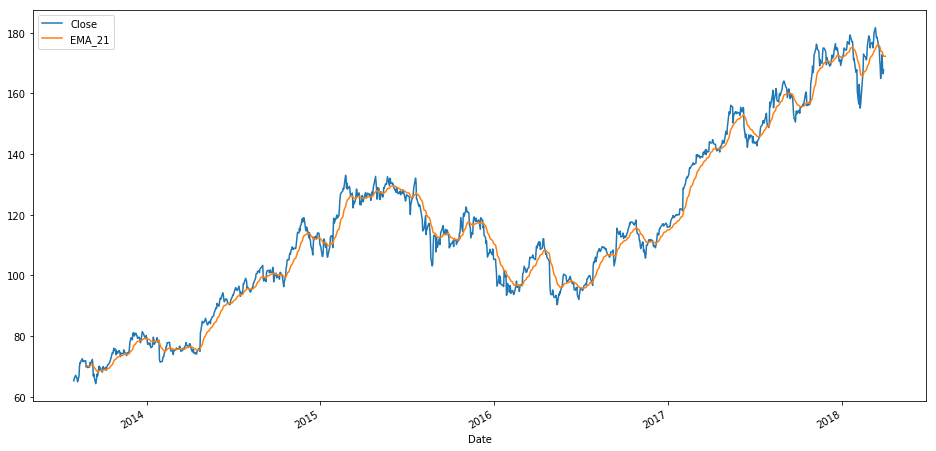

In [85]:
plot_single_TI(new_whole_df, 'AAPL', ['Close', 'EMA_21'])